In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob


In [2]:

# initial parameters
epochs = 50
lr = 1e-3
batch_size = 64
img_dims = (100,100,3)

data = []
labels = []


In [3]:

# load image files from the dataset
image_files = [f for f in glob.glob(r'C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\genderfemale\gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)


In [4]:

# converting images to arrays and labelling the categories
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # C:\Files\gender_dataset_face\woman\face_1162.jpg
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]


In [5]:

# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)


In [6]:

# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)




In [7]:
# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


In [8]:

# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model


In [9]:

# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


In [10]:
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = f'man-vs-woman-predication-{int(time.time())}'
tensorboard = TensorBoard(log_dir=f'logs\\{NAME}\\')

In [11]:
from tensordash.tensordash import Tensordash
histories = Tensordash(
    ModelName = 'Mobilenet',
    email = 'harshabolla@gmail.com', 
    password = 'Satya@406')

In [12]:

# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1,callbacks=[tensorboard,histories])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/28 [>.............................] - ETA: 0s - loss: 1.0196 - accuracy: 0.5469WARNING:tensorflow:From C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be r

Epoch 41/50
28/28 [==============================] - 131s 5s/step - loss: 0.0824 - accuracy: 0.9669 - val_loss: 0.2135 - val_accuracy: 0.9307
Epoch 42/50
28/28 [==============================] - 135s 5s/step - loss: 0.0854 - accuracy: 0.9693 - val_loss: 0.1235 - val_accuracy: 0.9567
Epoch 43/50
28/28 [==============================] - 83s 3s/step - loss: 0.0687 - accuracy: 0.9736 - val_loss: 0.2292 - val_accuracy: 0.9351
Epoch 44/50
28/28 [==============================] - 72s 3s/step - loss: 0.0949 - accuracy: 0.9657 - val_loss: 0.4902 - val_accuracy: 0.8442
Epoch 45/50
28/28 [==============================] - 65s 2s/step - loss: 0.0860 - accuracy: 0.9669 - val_loss: 0.2318 - val_accuracy: 0.9199
Epoch 46/50
28/28 [==============================] - 75s 3s/step - loss: 0.0628 - accuracy: 0.9747 - val_loss: 0.1234 - val_accuracy: 0.9502
Epoch 47/50
28/28 [==============================] - 76s 3s/step - loss: 0.0619 - accuracy: 0.9803 - val_loss: 0.4668 - val_accuracy: 0.8745
Epoch 48/50

In [13]:
cd C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\genderfemale

C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\genderfemale


In [14]:
print("[INFO] saving mask detector model...")
model.save("manwoman2.model", save_format="h5")


[INFO] saving mask detector model...


In [23]:
loss,train_acc=model.evaluate(trainX, trainY ,verbose=0)
loss,test_acc=model.evaluate(testX,testY ,verbose=0)
print("train: %.3f, Test: %.3f" % (train_acc,test_acc))


train: 0.990, Test: 0.970


In [26]:
print('test loss: %.3f'% loss)
print('accuracy: %.3f' % train_acc)

test loss: 0.075
accuracy: 0.990


KeyError: 'acc'

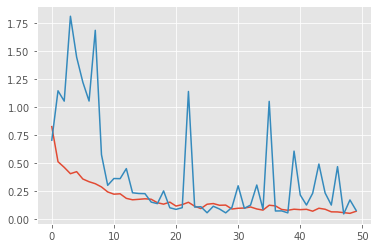

In [20]:

# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_acc"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')